## Домашнее задание по летней практике № 1

### Работа с типами данных

№ 2
Считайте три числа. Если одно при делении на второе даёт в остатке третье, выведите результат деления первого на второе нацело, иначе выведите строку «Остаток от деления _1_ на _2_ не равен _3_», где в соответствующих местах стоят считанные числа.


In [1]:
# 2
a, b, c = map(int, input().split())
print(a // b) if a % b == c else print(f'Остаток от деления {a} на {b} не равен {c}')

Остаток от деления 8 на 19 не равен 10


### Работа с масссивами

№ 4 Считайте строку, разбейте на слова. Каждое слово переверните наоборот, и составьте обратно в строку. Результат на печать. Пример: Позавчера было жарко -> аречвазоП олыб окраж


In [2]:
ans = ''
for n in input().split():
    ans += n[::-1] + ' '
ans = ans[:-1]
ans

'laog taog'

### Работа с функциями

№ 3 Напишите функцию сравнения двух строк, и возвращающую строку следующего вида: ashjfsa123890, ahhsssah24870 -> a*h**sa*2*8*0


In [3]:
def comparison(a = 'asdfghjkl',
               b = 'asdgfhjkl;;;') -> str:
    ans = ''
    for i, j in zip(a, b):
        if i == j:
            ans += i
        else:
            ans += '*'
    return ans

In [4]:
comparison()

'asd**hjkl'

### Работа с классами

№ 2 Напишите класс «пациент» с полями ФИО, фозраст, адрес, список посещений. Посещения – это отдельный класс, имеющий информацию о дате, враче, которого посетили, диагнозе, который был поставлен, назначениях, что делать с этим. В классе реализовать функцию проверки, есть ли у человека этот то диагноз – вывод – да\нет и дата последнего такого диагноза. Также функция вывода на печать всей истории диагнозов – даты с поставленными диагнозами.

In [5]:
class Visits:
    def __init__(self, date, doctor, output, wishes):
        self.date = date
        self.doctor = doctor
        self.output = output
        self.wishes = wishes

In [6]:
class People:
    def __init__(self, FIO, age, adres, lv):
        self.FIO = FIO
        self.age = age
        self.adres = adres
        self.lv = lv
        
        
    def check_diagnoz(self, diagnoz):
        for i in self.lv[::-1]:
            if i.output == diagnoz:
                return("YES", i.date)
        
        
    def list_diagnoz_output(self):
        for i in self.lv:
            print(i.date, i.output)

In [7]:
vis1 = Visits('20:01:22', 'Lor', 'Nasmork', 'drink vodka')
vis2 = Visits('22:01:22', 'Lor', 'Nasmork', 'drink vodka')
vis3 = Visits('03:02:22', 'Terapevt', 'Headpain', 'drink vodka')
peop = People('Ivanov I I', 20, 'Pobedi 23', [vis1, vis2, vis3])
ans = peop.check_diagnoz("Nasmork")
peop.list_diagnoz_output()
ans

20:01:22 Nasmork
22:01:22 Nasmork
03:02:22 Headpain


('YES', '22:01:22')

## Домашнее задание по летней практике № 2

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib.animation import FuncAnimation
from scipy.integrate import odeint
import scipy.optimize as sc

In [9]:
%matplotlib widget

### Работа с матрицами

№ 5
![](21photo.png)

In [10]:
row, col = int(input()), int(input())
matrix = np.array([list(map(int, input().split())) for _ in range(row)])
matrix

array([[34378,  7483,  3487],
       [  438,  4387,     0],
       [43289, 84327,     1]])

In [11]:
answer = np.array([np.std(row) for row in matrix]) # стандартное отклонение
answer

array([13717.64039476,  1972.93391228, 34430.02995448])

### Символьные вычисления 

№ 5 Считайте функцию от символьной переменной x. Считайте два числа – пределы изменения t. Выведите график этой функции, а также точками отметьте на графике её корни.

In [12]:
x = sp.Symbol('x')
function_input = input()
function = sp.simplify(function_input) # перевод из строки в функцию
print(f'{function=}')

function=x**2 + x - 1


In [13]:
equation = sp.Eq(function, 0) # создание уравнения
solution = sp.solve(equation, x) # решение уравнения
print(f'{equation=}', f'{solution=}', sep = '\n')

equation=Eq(x**2 + x - 1, 0)
solution=[-1/2 + sqrt(5)/2, -sqrt(5)/2 - 1/2]


In [14]:
function_draw = sp.lambdify(x, function) # перевод из sympy в python

In [16]:
a, b = int(input()), int(input())
delta_t = np.linspace(a, b, 100) # делим ось икс по
delta_f = [function_draw(i) for i in delta_t] #подставляем значения в функцию

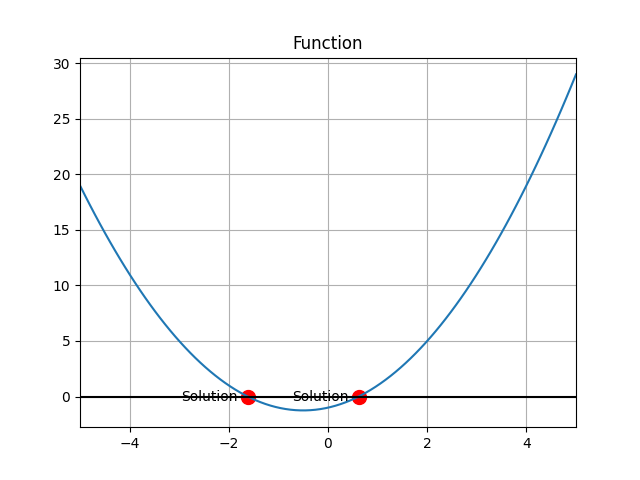

In [17]:
plt.figure()
plt.plot(delta_t, delta_f)
plt.hlines(0, a, b, color = 'black')
for i in range(len(solution)):
    min_max = solution[i]
    plt.scatter(min_max, function_draw(min_max), s = 100, color = 'red')
    plt.text(min_max- 0.2, function_draw(min_max), 'Solution', ha='right', va='center')
plt.xlim([a, b])
plt.title('Function')
plt.grid()
plt.show()

![](22photo.png)

In [18]:
x, y=sp.symbols('x, y')
equation1 = sp.Eq(x ** 2 -2 * y ** 2 - x * y + 2 * x - y + 1, 0) # создание уравнения
equation2 = sp.Eq(2 * x ** 2 - y ** 2 + x * y + 3 * y -5, 0) # создание уравнения
solution = sp.solve([equation1, equation2], [x, y])
solution


[(-5/3, -1/3), (-3/2, 1/2), (1, 1)]

In [19]:
values = {'x': [i[0] for i in solution],
          'y': [i[1] for i in solution]}

In [20]:
dataframe = pd.DataFrame(values)
dataframe

,x,y
0,-5/3,-1/3
1,-3/2,1/2
2,1,1


![](23photo.png)

Eq(f(x), x*(C1*exp(-x) - 1))
x*(C1*exp(-x) - 1)


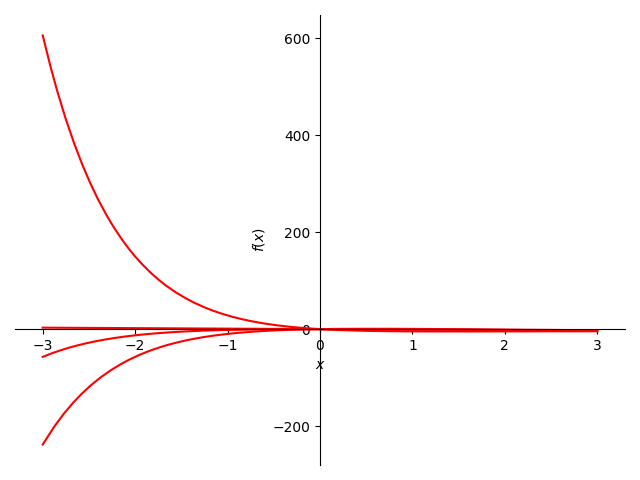

In [21]:
x = sp.Symbol('x')
f = sp.symbols('f', cls = sp.Function) # создание функции

equation = sp.Eq(f(x).diff(x, 1) * x + x ** 2 + f(x) * x - f(x), 0)    
print(sp.dsolve(equation))  # Решение диффура
solution = sp.dsolve(equation).rhs
print(solution)
ASubsed=[]
C = [-10, 1, 0, 4]
for v in C:
    ASubsed.append(sp.Subs(solution,'C1', v).doit())
sp.plotting.plot((ASubsed[0],(x,-3,3)),(ASubsed[1],(x,-3,3)),(ASubsed[2],(x,-3,3)),(ASubsed[3],(x,-3,3)),line_color='red')

### Численное решение уравнений

№ 5 Постройте график функци f(x) = log(sin(x)+1.5)-0.01*x**2, и численно найдите корни уравнения f(x)=0.


In [22]:
x = sp.Symbol('x')
function = sp.simplify('log(sin(x)+1.5)-0.01*x**2')
function_draw = sp.lambdify(x, function)
function

-0.01*x**2 + log(sin(x) + 1.5)

In [23]:
delta_t = np.linspace(-100, 100, 1000) # делим ось икс по
delta_f = [function_draw(i) for i in delta_t] # подставляем значения в функцию

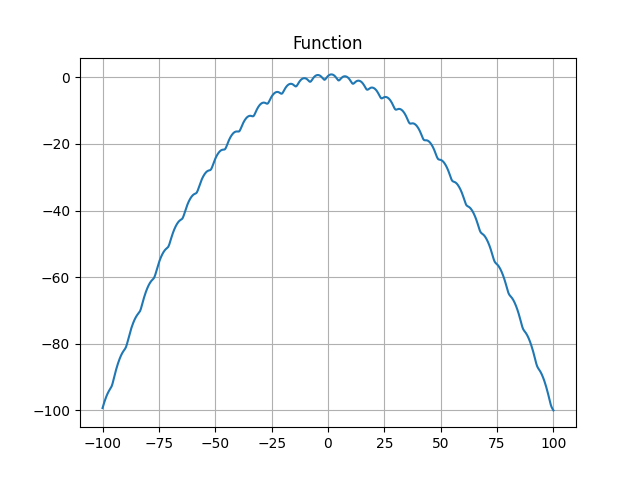

In [24]:
plt.figure()
plt.plot(delta_t, delta_f)
plt.title('Function')
plt.grid()
plt.show()

[-6.2966129]
[-2.70354653]
[-0.52046941]
[3.51866409]
[6.26360683]
[8.72770597]


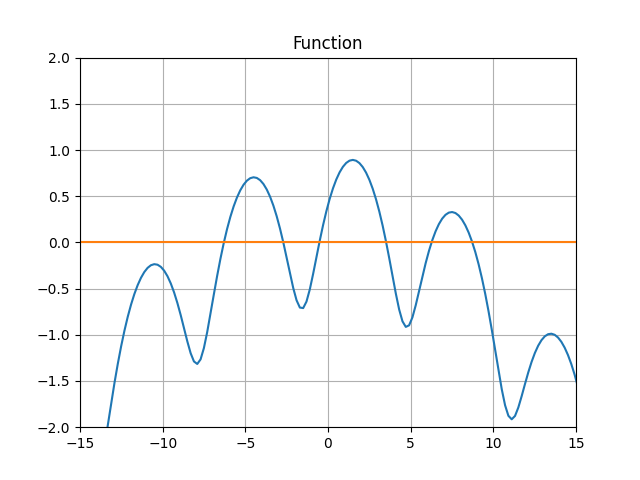

In [25]:
plt.figure()
plt.xlim([-15, 15])
plt.ylim([-2, 2])
plt.plot(delta_t, delta_f)
plt.title('Function')
plt.grid()
plt.plot([delta_t[0],delta_t[-1]],[0,0])

print(sc.root(function_draw, -6.3).x) # численное решение уравнения. Зависит от начальной точки.
print(sc.root(function_draw, -2.7).x)
print(sc.root(function_draw, -0.5).x)
print(sc.root(function_draw, 3.5).x) 
print(sc.root(function_draw, 6.3).x)
print(sc.root(function_draw, 8.7).x)

![](24photo.png)

In [ ]:
def odesys(x,t):
    dx0 = 2 * x[0] + x[1] ** 2 - 1
    dx1 = 6 * x[0] - x[1] ** 2 + 1 
    return [dx0, dx1]
x0 = [1, 0]
t = np.linspace(0, 1, 1001)
X = odeint(odesys, x0, t)
print(X)
plt.figure()
plt.plot(X[:,1], X[:,0])   #фазовая траектория
plt.plot(t, X[:,1], color='red')
plt.xlabel('t')
plt.ylabel('f')
plt.title('Решение системы дифуров')
plt.grid()
plt.legend(["x(t)", "V(t)"])
# plt.show()

In [ ]:
def odesys(x,t,A,B):
    dx0 = 2 * A * x[0] + x[1] ** 2 - 1 + 0 * np.sin(t) #ВАЖНО: добавляйте и зануляйте функцию от t
    dx1 = 6 * B * x[0] - x[0] ** 2 + 1
    return [dx0,dx1]
x0 = [1,0]
t = np.linspace(0, 1000, 10001)
X = odeint(odesys, x0, t, (-0.01, 0.1))   #odeint(odesys,x0,t,(-0.01,0.1)) - (cсисcтема, нач. точка, массив времени, параметры (a,b))
plt.figure()
plt.plot(t, X[:, 0])
plt.plot(t, X[:, 1], color='red')
plt.xlabel('t')
plt.ylabel('f')
plt.title('Решение системы дифуров')
plt.grid()
plt.legend(["x(t)", "V(t)"])
# plt.show()

x01=[-1, 0]
X1=odeint(odesys, x01, t, (-0.01, 0.1))

x02=[0, 1]
X2=odeint(odesys, x02, t, (-0.01, 0.1))

x03=[0, -1]
X3=odeint(odesys, x03, t, (-0.01,0.1))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
P0 = ax.plot(X[0,0],X[0,1], 'o', color = 'red')[0]
ax.plot(X[:,0],X[:,1], color = 'red')
P1 = ax.plot(X1[0,0],X1[0,1], 'o', color='blue')[0]
ax.plot(X1[:,0],X1[:,1], color='blue')
P2 = ax.plot(X2[0,0],X2[0,1],'o', color='green')[0]
ax.plot(X2[:,0],X2[:,1], color='green')
P3 = ax.plot(X3[0,0],X3[0,1], 'o')[0]
ax.plot(X3[:,0],X3[:,1])
#ax.xlabel('X0')
#ax.ylabel('X1')
#ax.title('Фазовая кривая')
#ax.grid()
#ax.legend(["x0 = [1,0]"])
ax.axis('equal')

def kino(i):
    P0.set_data(X[i,0],X[i,1])
    P1.set_data(X1[i,0],X1[i,1])
    P2.set_data(X2[i,0],X2[i,1])
    P3.set_data(X3[i,0],X3[i,1])
    return [P0, P1, P2, P3]

multik = FuncAnimation(fig,kino,interval=20,frames=len(t))

# plt.show()

## Домашнее задание по летней практике № 3

![](30photo.png)

![](31photo.png)

In [26]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as sc
import pandas as pd

In [27]:
def f(x):
    return x ** 4 - 3 * x ** 3 - 21 * x ** 2 + 43 * x + 60

In [28]:
def dihotomia(f, a, b, tol) -> float: # метод дихотомии поиска корня функции
    x = 0
    while abs(b - a) > tol:
        x = (a + b) / 2 # середина отрезка
        function_x = f(x) 
        function_a = f(a)
        # если середина отрезка и левая граница выше оси 'x', смещаем 'а' в середину отрезка
        # если середина отрезка ниже и левая граница ниже оси 'x', смещаем 'a' в середину отрезка
        # иначе смещаем правую границу в середину отрезка
        if function_x < 0 and function_a < 0 or function_x > 0 and function_a > 0: 
            a = x
        else:
            b = x
    return a

In [29]:
def our_root(f, x0=None, step=None, tol=None) -> float:
    if x0 is None:
        x0 = np.random.uniform(-100, 100) 
        print(f'{x0=}')
    if step is None:
        step = np.random.uniform(0.01, 0.1) 
        print(f'{step=}')
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
        print(f'{tol=}')
    a = x0
    b = a + step
    while True:
        a += step
        b += step
        function_a = f(a)
        function_b = f(b)
        if function_a > 0: # изначально над осью Х
            if function_a < function_b:  # движение в сторону возрастания, меняем направление
                step = -step
                b += 2 * step
            elif 0 <= function_b < function_a:  # движение в сторону оси Х
                continue
            elif function_b < function_a and function_b < 0:  # правая граница снизу от оси Х
                return dihotomia(f, a, b, tol)
        elif function_a < 0: # изначально под осью Х
            if function_a > function_b: # движение в сторону убывания, меняем направление
                step = -step
            elif function_a < function_b < 0: # движение в сторону оси Х
                continue
            elif function_b > function_a and function_b > 0: # правая граница сверху от оси Х
                return dihotomia(f, a, b, tol)
        else:
            return a

In [30]:
def our_min(f, x0=None, step=None, tol=None) -> float:
    if x0 is None:
        x0 = np.random.uniform(-100, 100) 
        print(f'{x0=}')
    if step is None:
        step = np.random.uniform(0.01, 0.1) 
        print(f'{step=}')
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
        print(f'{tol=}')
    a = x0
    b = a + step
    while True: 
        a += step
        b += step
        function_a = f(a)
        function_b = f(b)
        if function_b < function_a: # движение в сторну убывания
            continue
        elif function_b > function_a: # движение в сторону возрастания
            b -= 2 * step # возвращаемся на 2 точки назад
            step /= -2 # уменьшаем шаг и меняем напрвление
        if abs(a - b) < tol:
            return a

In [31]:
def our_max(f, x0=None, step=None, tol=None) -> float:
    if x0 is None:
        x0 = np.random.uniform(-100, 100) 
        print(f'{x0=}')
    if step is None:
        step = np.random.uniform(0.01, 0.1) 
        print(f'{step=}')
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
        print(f'{tol=}')
    a = x0
    b = a + step
    while True: 
        a += step
        b += step
        function_a = f(a)
        function_b = f(b)
        if function_b > function_a: # движение в сторону возрастания
            continue
        elif function_b < function_a:# движение в сторону уменьшения, меняем направление
            b -= 2 * step # возвращаемся на 2 точки назад
            step /= -2 # уменьшаем шаг и меняем напрвление
        if abs(a - b) < tol:
            return a

In [32]:
our_root(f)

x0=-53.86446545670018
step=0.07741360001396469
tol=0.0030708804485089477


-4.000430347705651

In [33]:
our_min(f, 0, 0.06, 0.01)

-2.8199999999999963

In [34]:
our_max(f, -2, 0.00005, 0.001)

0.9170500000019154

In [35]:
x = sp.Symbol('x')
function = sp.simplify('x ** 4 - 3 * x ** 3 - 21 * x ** 2 + 43 * x + 60')
function_draw = sp.lambdify(x, function)
function_dx = sp.diff(function, x) # производная функции
function_dxx = sp.diff(function_dx, x) # 2 производная функции
print(f'{function=}', f'{function_dx=}', f'{function_dxx=}', sep = '\n')

function=x**4 - 3*x**3 - 21*x**2 + 43*x + 60
function_dx=4*x**3 - 9*x**2 - 42*x + 43
function_dxx=12*x**2 - 18*x - 42


In [36]:
equation_root = sp.Eq(function, rhs=0) # создание уравнения
solution_root = sp.solve(equation_root, x) # решение уравнения
print(f'{equation_root=}', f'{solution_root=}', sep = '\n')

equation_root=Eq(x**4 - 3*x**3 - 21*x**2 + 43*x + 60, 0)
solution_root=[-4, -1, 3, 5]


In [37]:
equation_extreme = sp.Eq(function_dx, rhs=0) # создение уравнения
solution_extreme = sp.solve(equation_extreme, x, cubics = False) # находение экстремумов
print(f'{equation_extreme=}', f'{solution_extreme=}', sep = '\n')

equation_extreme=Eq(4*x**3 - 9*x**2 - 42*x + 43, 0)
solution_extreme=[CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 0), CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 1), CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 2)]


In [38]:
dots_max = [sp.simplify(i) for i in solution_extreme if round(function_dxx.evalf(subs={x:i})) < 0]
dots_min = [sp.simplify(i) for i in solution_extreme if round(function_dxx.evalf(subs={x:i})) > 0]

In [39]:
print(f'Max = {dots_max}')
print(f'Min = {dots_min}')

Max = [CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 1)]
Min = [CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 0), CRootOf(4*x**3 - 9*x**2 - 42*x + 43, 2)]


In [40]:
function_draw = sp.lambdify(x, function) # перевод функции из sympy в python
function_dx_draw = sp.lambdify(x, function_dx)

In [41]:
delta_x_root = np.linspace(-5, 6, 100) # делим ось икс по
delta_f_root = [function_draw(i) for i in delta_x_root] # подставляем значения в функцию

delta_x_extreme = np.linspace(-5, 6, 100) # делим ось икс по
delta_f_extreme = [function_dx_draw(i) for i in delta_x_root] # подставляем значения в функцию

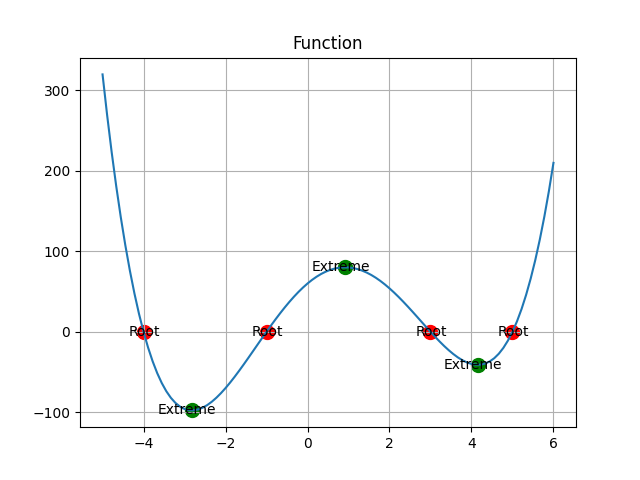

In [42]:
plt.figure()
plt.plot(delta_x_root, delta_f_root)
plt.title('Function')
for i in range(len(solution_root)):
    min_max = solution_root[i]
    plt.scatter(min_max, function_draw(min_max), s = 100, color = 'red')
    plt.text(min_max+ 0.4, function_draw(min_max), 'Root', ha='right', va='center')
for i in range(len(solution_extreme)):
    min_max = solution_extreme[i]
    plt.scatter(min_max, function_draw(min_max), s = 100, color = 'green')
    plt.text(min_max+ 0.6, function_draw(min_max), 'Extreme', ha='right', va='center')
plt.grid(True)
plt.show()

[-4.]
[-1.]
[3.]
[5.]


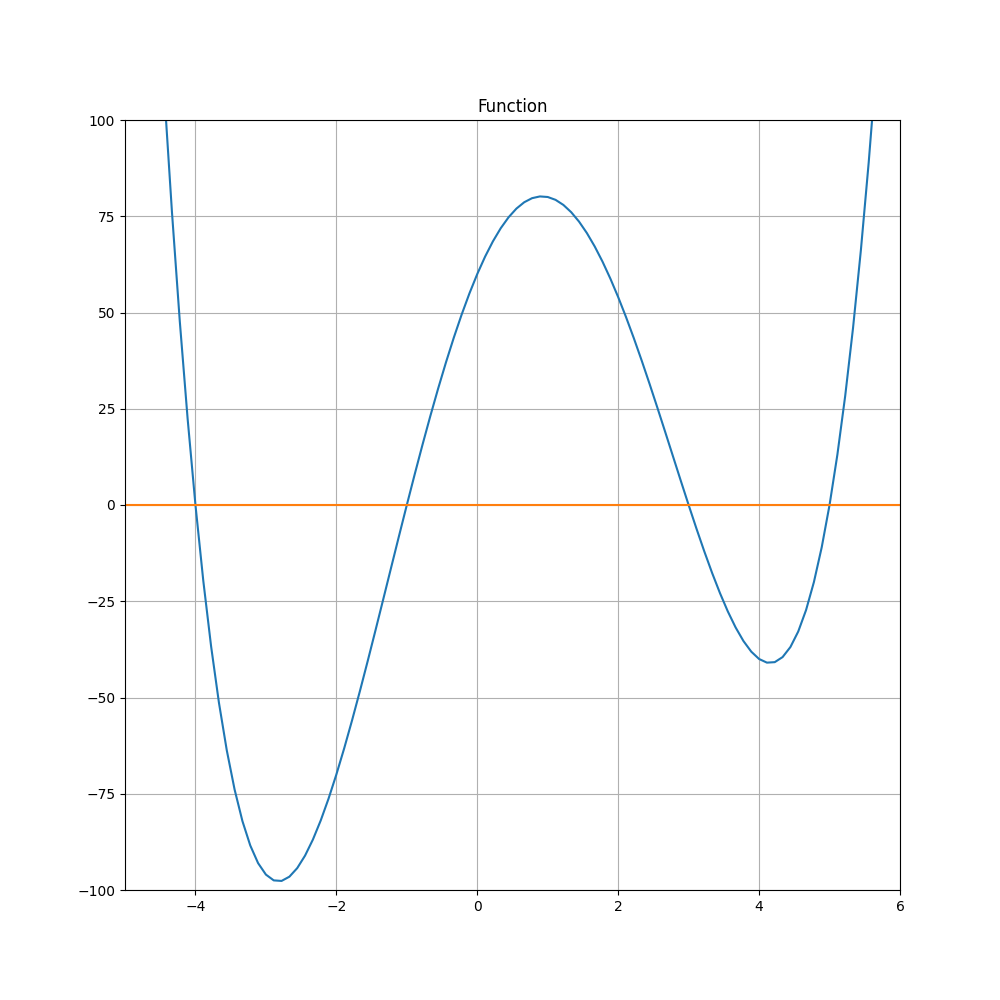

In [43]:
plt.figure(figsize = (10, 10))
plt.xlim([-5, 6])
plt.ylim([-100, 100])
plt.plot(delta_x_root, delta_f_root)
plt.title('Function')
plt.grid()
plt.plot([delta_x_root[0],delta_x_root[-1]],[0,0])

print(sc.root(function_draw, -4).x) # численное решение уравнения. Зависит от начальной точки.
print(sc.root(function_draw, -1).x)
print(sc.root(function_draw, 3).x)
print(sc.root(function_draw, 5).x)

[-2.82158578]
[0.91704916]
[4.15453662]


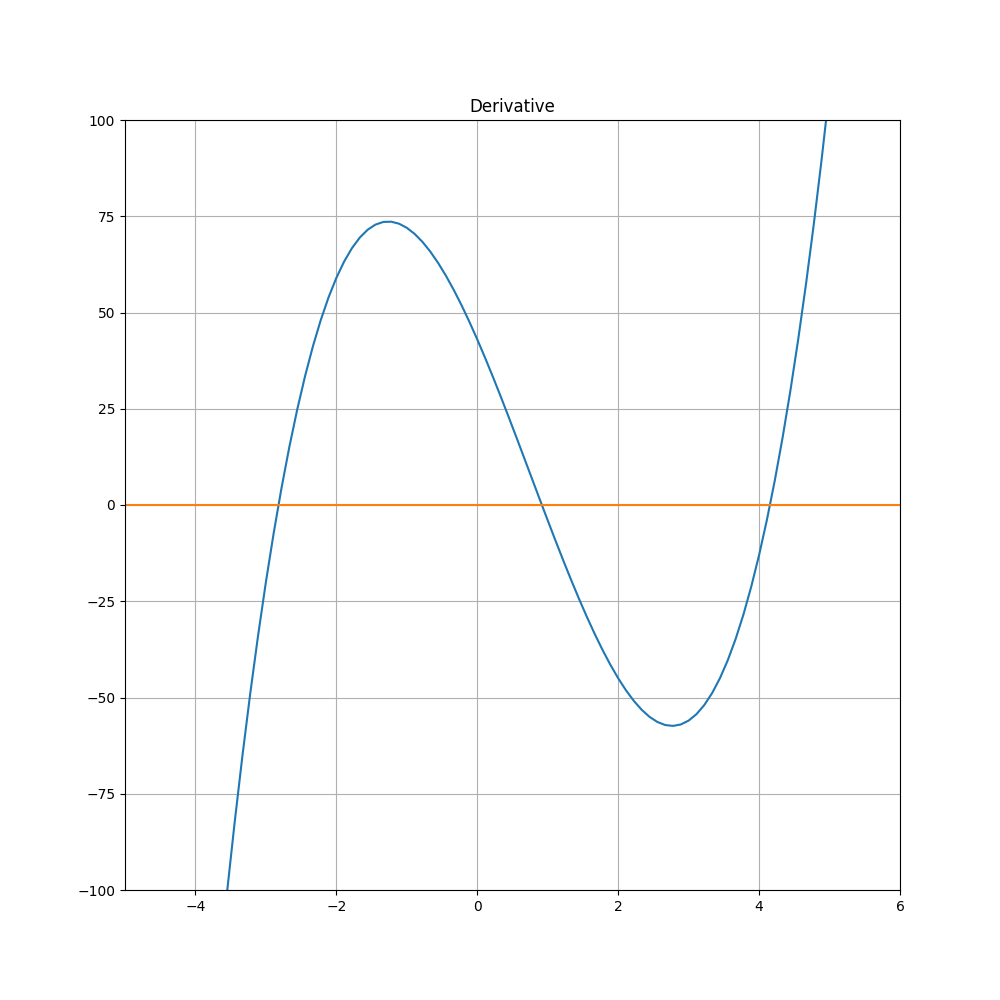

In [44]:
plt.figure(figsize = (10, 10))
plt.xlim([-5, 6])
plt.ylim([-100, 100])
plt.plot(delta_x_extreme, delta_f_extreme)
plt.title('Derivative')
plt.grid()
plt.plot([delta_x_extreme[0],delta_x_extreme[-1]],[0,0])
print(sc.root(function_dx_draw, -2.82).x) # численное решение уравнения. Зависит от начальной точки.
print(sc.root(function_dx_draw, 0.92).x)
print(sc.root(function_dx_draw, 4.15).x)

![](32photo.png)

![](33photo.png)

In [45]:
def f2(x, y):
    return x ** 2 + 2 * x * y + 6 * y ** 2 + 2 * x + 7 * y + 9

In [46]:
def our_TwoVarsMinimum(f2, x0=None, step=None, tol=None) -> tuple[float, float]: #метод покоординатного спуска 2мерной функции
    if x0 is None:
        x0 = [np.random.uniform(-100, 100), np.random.uniform(-100, 100)] 
        print(f'{x0=}')
    if step is None:
        step = np.random.uniform(0.01, 0.1) 
        print(f'{step=}')
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
        print(f'{tol=}')
    x, y = x0
    i = 1
    while True: 
        '''
        Запускаем итергационный алгоритм поиска, подставляем в полученный локальный минимум другой переменной шагом ранее. 
        В our_min подставляем начальное положение как предыдущий лок мин по той же координате.
        '''
        function_x = lambda x: f2(x, y) 
        x = our_min(function_x, x, step, tol)
        
        function_y = lambda y: f2(x, y)
        y = our_min(function_y, y, step, tol)
        
        print(f'{i}) {x=}, {y=}')
        if np.sqrt((x - x0[0]) ** 2 + (y - x0[1]) ** 2) < tol and abs(f2(x, y) - f2(x0[0], x0[1])) < tol:
            return x, y
        x0 = x, y
        i += 1
    

In [47]:
our_TwoVarsMinimum(f2, [100,100], 0.007, 0.001)

1) x=-100.99800000009105, y=16.25199999995614
2) x=-17.253500000071174, y=2.2939999999548286
3) x=-3.2990000000714628, y=-0.03000000004516706
4) x=-0.971500000071456, y=-0.41850000004516735
5) x=-0.5830000000714556, y=-0.4850000000451674
6) x=-0.5165000000714555, y=-0.4955000000451674
7) x=-0.5060000000714554, y=-0.4955000000451674
8) x=-0.5025000000714553, y=-0.4990000000451674
9) x=-0.49900000007145534, y=-0.4990000000451674
10) x=-0.49900000007145534, y=-0.4990000000451674


(-0.49900000007145534, -0.4990000000451674)

In [48]:
x, y = sp.symbols('x y')
function = sp.simplify('x ** 2 + 2 * x * y + 6 * y ** 2 + 2 * x + 7 * y + 9')
function_dx = sp.diff(function, x)
function_dy = sp.diff(function, y)
function_diff = function_dx / function_dy
print(f'{function=}', f'{function_dx=}', f'{function_dy=}', f'{function_diff=}', sep = '\n')

function=x**2 + 2*x*y + 2*x + 6*y**2 + 7*y + 9
function_dx=2*x + 2*y + 2
function_dy=2*x + 12*y + 7
function_diff=(2*x + 2*y + 2)/(2*x + 12*y + 7)


In [49]:
equation = sp.Eq(function_diff, rhs=0)
solution = sp.solve([equation], [x, y])
print(f'{equation=}', f'{solution=}', sep = '\n')

equation=Eq((2*x + 2*y + 2)/(2*x + 12*y + 7), 0)
solution={x: -y - 1}


In [50]:
delta_x = np.linspace(-100, 100, 100) # делим по абциссе
delta_y = np.linspace(-100, 100, 100) # делим по ординате

In [51]:
X, Y = np.meshgrid(delta_x, delta_y)
Z = f2(X,Y)

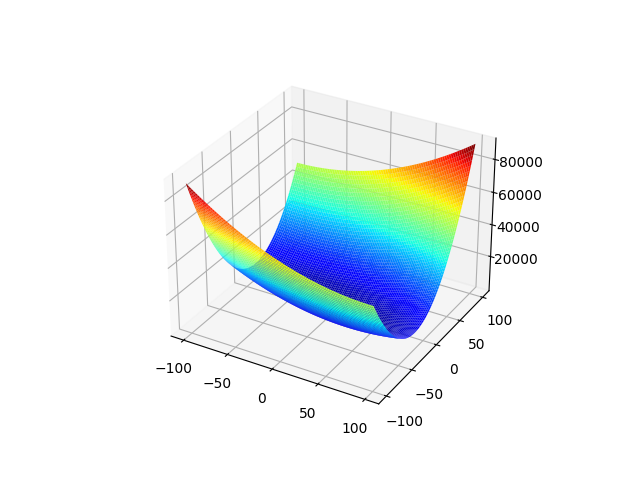

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')

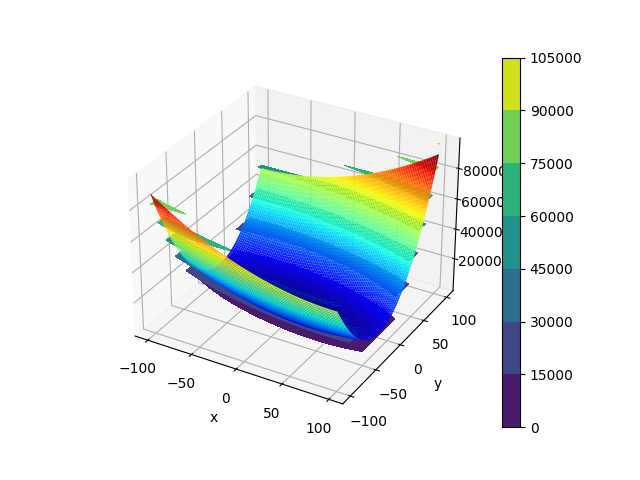

In [53]:
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Домашнее задание по летней практике № 4

![](42photo.png)

In [54]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as sc
import pandas as pd

In [55]:
x, y = sp.symbols('x y')

In [56]:
def f2(x, y):
    return sp.sin(x + y + x * y - 0.2)

In [57]:
def not_in(dot: float, list_dot: list) -> bool:
    f = True
    for i in list_dot:
        if abs(dot - i) < 0.1:
            f = False
    return f

In [58]:
def min_root_max(function, tol= None) -> tuple: #  поиск мин корня
    if tol is None:
        tol = np.random.uniform(0.001, 0.01) 
    local_min = [] # min на одной стороне рамки
    local_root = [] # root на одной стороне рамки
    local_max = [] # max на одной стороне рамки
    for i in np.linspace(0, 3, 6000):
        if abs(function(i) + 1) < tol and not_in(round(i, 3), local_min): # min
            local_min.append(round(i, 3))
        if abs(function(i)) < tol and not_in(round(i, 3), local_root): # root
            local_root.append(round(i, 3))
        if abs(function(i) - 1) < tol and not_in(round(i, 3), local_max): # max
            local_max.append(round(i, 3))
            
    # if len(local_min) == 0:
    #     local_min.append(0) if function(0) <= function(3) else local_min.append(3)
    # if len(local_max) == 0:
    #     local_max.append(3) if function(0) <= function(3) else local_min.append(0)
    return local_min, local_root, local_max

In [59]:
def create_fucntion() -> dict:
    function_y0 = sp.lambdify(x, f2(x, 0)) # y = 0 Bottom side
    function_x3 = sp.lambdify(y, f2(3,  y)) # x = 3 Right side
    function_y3 = sp.lambdify(x, f2(x, 3)) # y = 3 Top side
    function_x0 = sp.lambdify(y, f2(0, y)) # x = 0 Left side
    
    sides = {'нижней(y=0)': function_y0,
         'правой(x=3)': function_x3,
         'верхней(y=3)': function_y3,
         'левой(x=0)': function_x0
        }
    return sides

In [60]:
def min_root_max_frame() -> tuple:
  min = [] # минимумы со всех сторон рамки
  root = [] # корни со всех сторон рамки
  max = [] # максимумы со всех сторон рамки
  for key, value in create_fucntion().items():
    global_min, global_root, global_max = min_root_max(value, 0.001)
    print(f'В  проходе по {key} рамке вычеслены:', 
          f'{global_min=}', 
          f'{global_root=}', 
          f'{global_max=}', 
          sep='\n')
    print()
    
    if key.__contains__('0'):
          if key.__contains__('y'):
            [min.append((i, 0)) for i in global_min]
            [root.append((i, 0)) for i in global_root]
            [max.append((i, 0)) for i in global_max]
          else:
            [min.append((0, i)) for i in global_min]
            [root.append((0, i)) for i in global_root]
            [max.append((0, i)) for i in global_max]
    else:
          if key.__contains__('y'):
            [min.append((i, 3)) for i in global_min]
            [root.append((i, 3)) for i in global_root]
            [max.append((i, 3)) for i in global_max]
          else:
            [min.append((3, i)) for i in global_min]
            [root.append((3, i)) for i in global_root]
            [max.append((3, i)) for i in global_max]
  
  print(f'{min=}', f'{root=}', f'{max=}', sep = '\n')
  return min, root, max

In [61]:
def min_root_max_in_frame() -> tuple:
    min_in = []
    root_in = []
    max_in = []
    for i in np.linspace(0.01, 3, 400):
        function = sp.lambdify(x, f2(x, i))
        global_min, global_root, global_max = min_root_max(function, 0.001)
        [min_in.append((j, i)) for j in global_min]
        [root_in.append((j, i)) for j in global_root]
        [max_in.append((j, i)) for j in global_max]
        
    return min_in, root_in, max_in

In [62]:
def draw_function()  -> None:
    plt.figure(figsize = (10, 10))
    plt.title('Function')
    min, root, max = min_root_max_frame()
    for i in min:
        plt.scatter(i[0], i[1], s = 20, color = 'blue')
    for i in root:
        plt.scatter(i[0], i[1], s = 20, color = 'red')
    for i in max:
        plt.scatter(i[0], i[1], s = 20, color = 'green')
        
    min_in, root_in, max_in = min_root_max_in_frame()
    for i in min_in:
        dmin = plt.scatter(i[0], i[1], s = 20, color = 'blue', label = 'min')
    for i in root_in:
        droot = plt.scatter(i[0], i[1], s = 20, color = 'red', label = 'root')
    for i in max_in:
        dmax = plt.scatter(i[0], i[1], s = 20, color = 'green', label = 'max')
    plt.legend((dmin, droot, dmax), 
               ('min', 'root', 'max'),
               scatterpoints=1,
               loc='lower left',
               ncol=3,
               fontsize=8)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.show()

В  проходе по нижней(y=0) рамке вычеслены:
global_min=[]
global_root=[0.199]
global_max=[1.726]

В  проходе по правой(x=3) рамке вычеслены:
global_min=[0.467, 2.038]
global_root=[0.086, 0.871, 1.656, 2.441]
global_max=[1.253, 2.823]

В  проходе по верхней(y=3) рамке вычеслены:
global_min=[0.467, 2.038]
global_root=[0.086, 0.871, 1.656, 2.441]
global_max=[1.253, 2.823]

В  проходе по левой(x=0) рамке вычеслены:
global_min=[]
global_root=[0.199]
global_max=[1.726]

min=[(3, 0.467), (3, 2.038), (0.467, 3), (2.038, 3)]
root=[(0.199, 0), (3, 0.086), (3, 0.871), (3, 1.656), (3, 2.441), (0.086, 3), (0.871, 3), (1.656, 3), (2.441, 3), (0, 0.199)]
max=[(1.726, 0), (3, 1.253), (3, 2.823), (1.253, 3), (2.823, 3), (0, 1.726)]


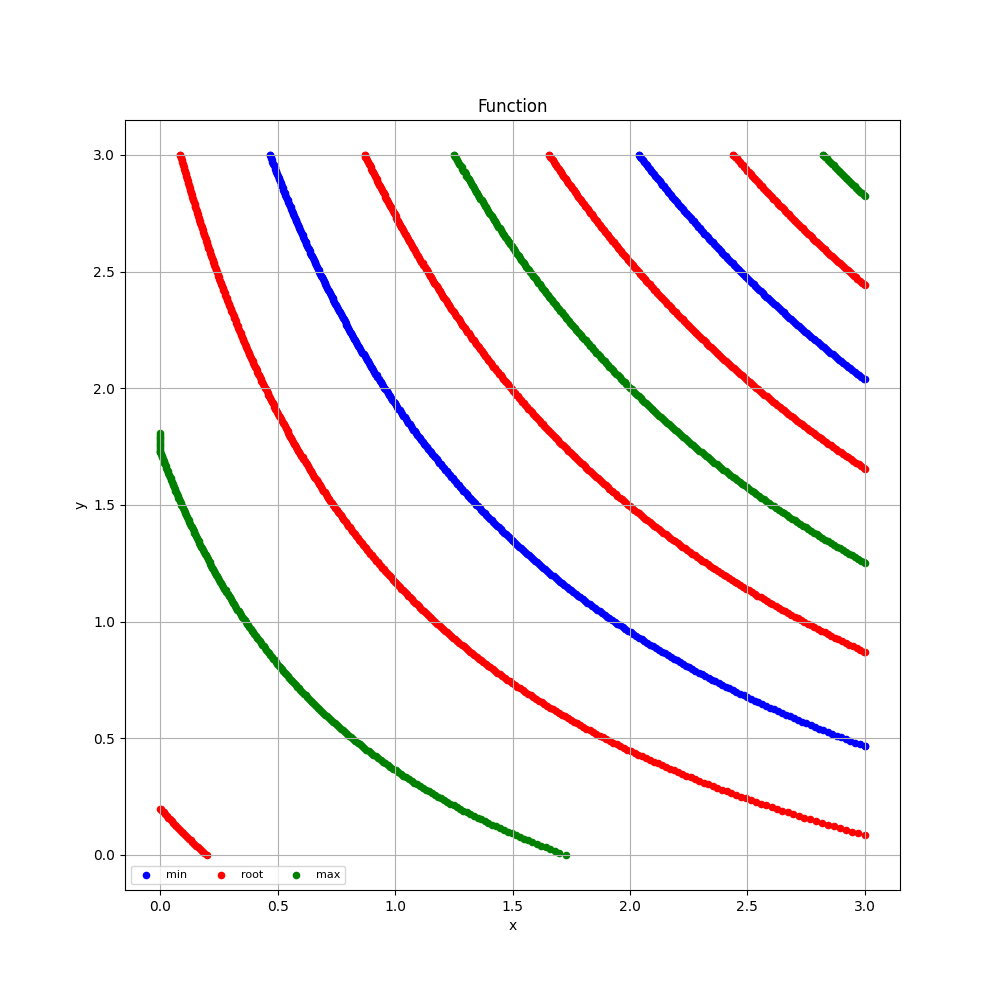

In [63]:
draw_function()

In [64]:
def f2(x, y):
    return np.sin(x + y + x * y - 0.2)

In [65]:
delta_x = np.linspace(-100, 100, 100) # делим по абциссе
delta_y = np.linspace(-100, 100, 100) # делим по ординате

In [66]:
X, Y = np.meshgrid(delta_x, delta_y)
Z = f2(X,Y)

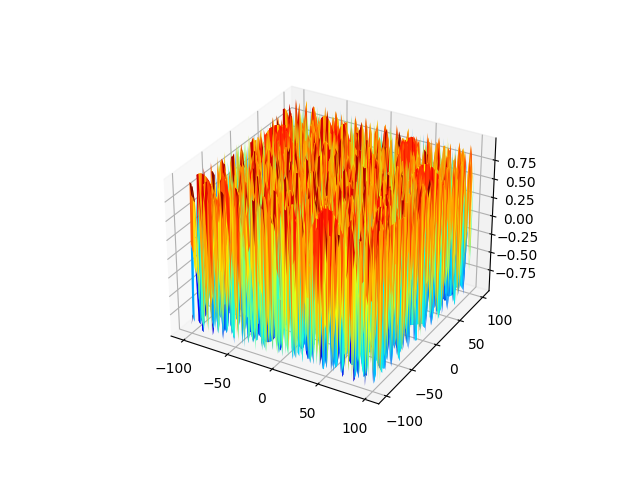

In [67]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')

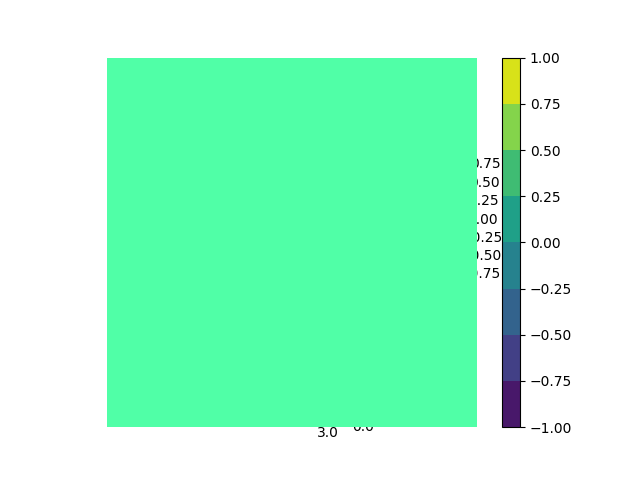

In [68]:
plt.contourf(X, Y, Z)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(right = 3, left = 0)
plt.ylim(top = 3, bottom = 0)
plt.show()

## Домашнее задание по летней практике № 5

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import sympy as sp

### level 1

In [3]:
s1 = sc.loadmat(r"Level1_Data1.mat")
series1 = s1['D']

In [4]:
series1

array([[ 9.32535806, 13.34186105,  0.15554921, ..., 13.10593619,
         0.17878968, 14.96352156]])

In [5]:
n: int = 100

In [6]:
series1_min = np.min(series1)
series1_max = np.max(series1)
points1 = np.linspace(series1_min, series1_max, n+1)
count1 = []

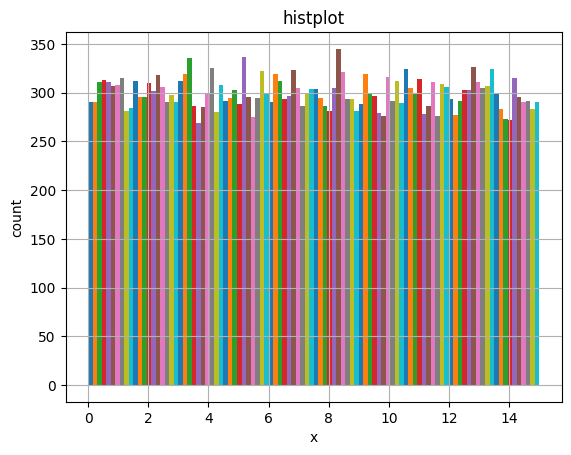

In [7]:
plt.figure()
for i in range(1, n+1):
    count_now1 =np.count_nonzero(series1 < points1[i]) - np.count_nonzero(series1 < points1[i - 1])
    count1.append(count_now1)
    plt.fill([points1[i-1], points1[i-1], points1[i], points1[i], points1[i-1]], [0, count_now1, count_now1, 0, 0])
plt.xlabel('x')
plt.ylabel('count')
plt.title('histplot')
plt.grid()
plt.show()

In [8]:
print('Распределение равномерное')
A = series1_min
B = series1_max
print(f'{A=:.5}', f'{B=:.5}', sep = '\n')

Распределение равномерное
A=0.00012885
B=15.0


### level 2

In [9]:
s2 = sc.loadmat(r"Level2_Data1.mat")
series2 = s2['D']

In [10]:
m: int = 100

In [11]:
series2_min = np.min(series2)
series2_max = np.max(series2)
series2_mean = np.mean(series2)
points2 = np.linspace(series2_min, series2_max, m+1)
count2 = []

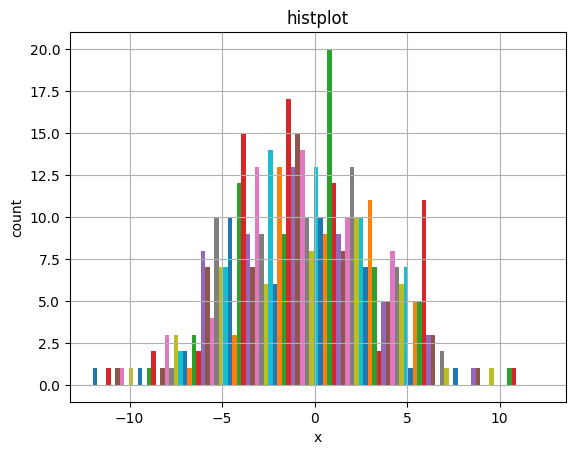

In [13]:
plt.figure()
for i in range(1, m+1):
    count_now2 =np.count_nonzero(series2 < points2[i]) - np.count_nonzero(series2 < points2[i - 1])
    count2.append(count_now2)
    plt.fill([points2[i-1], points2[i-1], points2[i], points2[i], points2[i-1]], [0, count_now2, count_now2, 0, 0])
plt.xlabel('x')
plt.ylabel('count')
plt.title('histplot')
plt.grid()
plt.show()

In [14]:
print('Распределение нормальное')
M: float = np.sum(series2) / np.shape(series2)[1]
D: float = np.sum([(Xi - M) ** 2 for Xi in series2]) / np.shape(series2)[1]
MSD: float = np.sqrt(D)
print(f'{M=:.5}', f'{D=:.5}', f'{MSD=:.5}', sep = '\n')

Распределение нормальное
M=-0.51348
D=14.738
MSD=3.839


### Linear Regression

In [15]:
s3 = sc.loadmat(r"LineMNK_Data1.mat")

In [16]:
X = s3['X']
Y = s3['Y']
print(np.shape(X), type(X), sep = '\n')

(1, 1000)
<class 'numpy.ndarray'>


In [17]:
X_sum = X.sum()
Y_sum = Y.sum()
X2 = X ** 2
XY = X * Y 
X2_sum = X2.sum()
XY_sum = XY.sum()
print(f'{X_sum=}', f'{Y_sum=}', f'{X2_sum=}', f'{XY_sum=}', sep = '\n')

X_sum=4999.999999999999
Y_sum=23701.244717367084
X2_sum=33350.01668335002
XY_sum=153686.00268217552


In [18]:
k, b = sp.symbols('K B')

In [19]:
function1 = sp.Eq(k * X2_sum + b * X_sum - XY_sum, 0)
function2 = sp.Eq(k * X_sum + b * np.shape(X)[1] - Y_sum, 0)

In [20]:
b_solve, k_solve = sp.solve([function1, function2], [k, b]).values()
print(f'Solved k = {k_solve}', f'Solved b = {b_solve}', sep = '\n')

Solved k = 4.21313877917026
Solved b = 2.63555082151581


In [21]:
Y_solve = np.array([k_solve * x + b_solve for x in X])

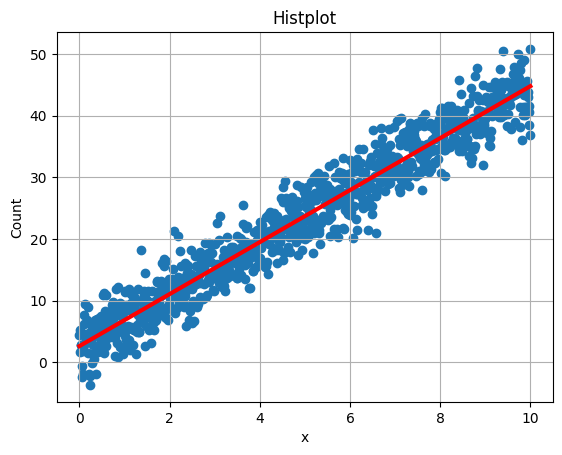

In [22]:
plt.figure()
for x, y in zip(X, Y):
    plt.scatter(x, y)
plt.plot(X[0][:], Y_solve[0][:], color = 'red', linewidth=3.0)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Histplot')
plt.grid()
plt.show()

### Quad Regression

In [23]:
s4 = sc.loadmat(r"QuadMNK_Data1.mat")

In [24]:
X = s4['X']
Y = s4['Y']
print(np.shape(X), type(X), sep = '\n')

(1, 1000)
<class 'numpy.ndarray'>


In [25]:
X_sum = X.sum()
Y_sum = Y.sum()
X2 = X ** 2
XY = X * Y 
X2_sum = X2.sum()
XY_sum = XY.sum()
X3 = X ** 3
X2Y = X2 * Y
X3_sum = X3.sum()
X2Y_sum = X2Y.sum()
X4 = X ** 4
X4_sum = X4.sum()
print(f'{X_sum=}', f'{Y_sum=}', f'{X2_sum=}', f'{XY_sum=}',
      f'{X3_sum=}', f'{X2Y_sum=}', f'{X4_sum=}',
      sep = '\n')

X_sum=0.0
Y_sum=16426.964937562665
X2_sum=3006.006006006006
XY_sum=9402.876463812107
X3_sum=-1.3642420526593924e-12
X2Y_sum=84184.20497873831
X4_sum=16264.908108064777


In [26]:
a, b, c = sp.symbols('a b c')

In [27]:
function1 = sp.Eq(X2Y_sum - a * X4_sum - b * X3_sum - c * X2_sum, 0)
function2 = sp.Eq(XY_sum - a * X3_sum - b * X2_sum - c * X_sum, 0)
function3 = sp.Eq(Y_sum - a * X2_sum - b * X_sum - c * np.shape(X)[1], 0)

In [28]:
a_solve, b_solve, c_solve = sp.solve([function1, function2, function3], [a, b, c]).values()
print(f'Solved a = {a_solve}', f'Solved b = {b_solve}', f'Solved c = {c_solve}', sep = '\n')

Solved a = 4.81469626871560
Solved b = 3.12802983261681
Solved c = 1.95395903670888


In [29]:
Y_solve = np.array([a_solve * x ** 2 + b_solve * x + c_solve for x in X])
np.shape(Y)

(1, 1000)

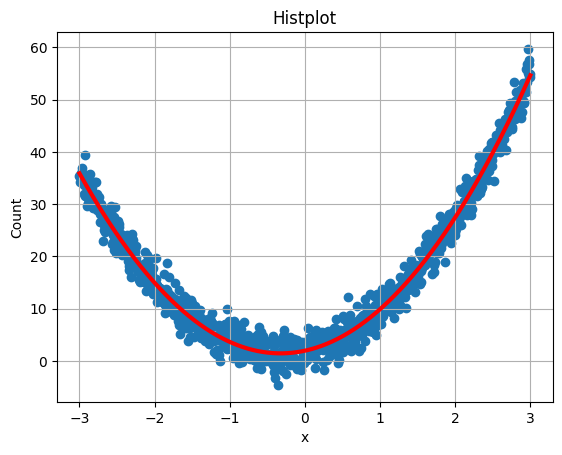

In [30]:
plt.figure()
for x, y in zip(X, Y):
    plt.scatter(x, y)
plt.plot(X[0][:], Y_solve[0][:], color = 'red', linewidth=3.0)
plt.xlabel('x')
plt.ylabel('Count')
plt.title('Histplot')
plt.grid()
plt.show()